**Connect google drive**

In [1]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Wed May  8 21:43:50 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
#!ls /mydrive

Mounted at /content/gdrive


In [ ]:
pwd

'/content/darknet'

**1) Clone, configure & compile Darknet**



In [ ]:
cd /content/gdrive/MyDrive/ARK_Task_5/yolov3

/content/gdrive/MyDrive/ARK_Task_5/yolov3


In [3]:
# Clone
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15851, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15851 (delta 5), reused 13 (delta 4), pack-reused 15833
Receiving objects: 100% (15851/15851), 14.42 MiB | 12.97 MiB/s, done.
Resolving deltas: 100% (10671/10671), done.


In [4]:
# Configure
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
!sudo find / -name "libopencv_core.so.3.2*".

find: ‘/proc/63/task/63/net’: Invalid argument
find: ‘/proc/63/net’: Invalid argument


In [5]:
# Compile
!make

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: warning: unused variable ‘bu

**2) Configure yolov3.cfg file**

In [6]:
# Make a copy of yolov3.cfg
!cp cfg/yolov3.cfg cfg/yolov3_training.cfg

In [13]:
# Change lines in yolov3.cfg file
!sed -i 's/batch=1/batch=64/' cfg/yolov3_training.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' cfg/yolov3_training.cfg
'''!sed -i 's/max_batches = 500200/max_batches = 2000/' cfg/yolov3_training.cfg
!sed -i '610 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '696 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '783 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '603 s@filters=255@filters=18@' cfg/yolov3_training.cfg
!sed -i '689 s@filters=255@filters=18@' cfg/yolov3_training.cfg
!sed -i '776 s@filters=255@filters=18@' cfg/yolov3_training.cfg'''

"!sed -i 's/max_batches = 500200/max_batches = 2000/' cfg/yolov3_training.cfg\n!sed -i '610 s@classes=80@classes=1@' cfg/yolov3_training.cfg\n!sed -i '696 s@classes=80@classes=1@' cfg/yolov3_training.cfg\n!sed -i '783 s@classes=80@classes=1@' cfg/yolov3_training.cfg\n!sed -i '603 s@filters=255@filters=18@' cfg/yolov3_training.cfg\n!sed -i '689 s@filters=255@filters=18@' cfg/yolov3_training.cfg\n!sed -i '776 s@filters=255@filters=18@' cfg/yolov3_training.cfg"

In [ ]:
pwd

'/content/darknet'

**3) Create .names and .data files**

In [8]:
!echo -e 'ball' > data/obj.names
!echo -e 'classes= 1\ntrain  = data/train.txt\nvalid  = data/test.txt\nnames = data/obj.names\nbackup = /content/gdrive/MyDrive/ARK_Task_5/yolov3' > data/obj.data

**4) Save yolov3_training.cfg and obj.names files in Google drive**

In [9]:
!cp cfg/yolov3_training.cfg /content/gdrive/MyDrive/ARK_Task_5/yolov3/yolov3_testing.cfg
!cp data/obj.names /content/gdrive/MyDrive/ARK_Task_5/yolov3/classes.txt

**5) Create a folder and unzip image dataset**

In [ ]:
!mkdir data/obj
#!unzip /mydrive/yolov3/images.zip -d data/obj

**6) Create train.txt file**

In [10]:
import glob
images_list = glob.glob("/content/gdrive/MyDrive/ARK_Task_5/image_dataset_YOLO/train/*.jpg")
with open("data/train.txt", "w") as f:
    f.write("\n".join(images_list))

**7) Download pre-trained weights for the convolutional layers file**

In [11]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2024-05-08 21:48:31--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  49.4MB/s    in 3.2s    

2024-05-08 21:48:35 (48.6 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



**8) Start training**

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_training.cfg darknet53.conv.74 -dont_show
# Uncomment below and comment above to re-start your training from last saved weights
#!./darknet detector train data/obj.data cfg/yolov3_training.cfg  /content/gdrive/MyDrive/ARK_Task_5/yolov3/yolov3_training_last.weights -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000005, iou_loss = 0.000000, total_loss = 0.000005 
 total_bbox = 65732, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.011307, iou_loss = 0.000000, total_loss = 0.011307 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.890933), count: 4, class_loss = 0.000082, iou_loss = 0.054035, total_loss = 0.054116 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 65736, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.000001, iou_loss = 0.000000, total_loss = 0.000001 
v3 (mse

In [3]:
cd /content/gdrive/MyDrive/ARK_Task_5/yolov3

/content/gdrive/MyDrive/ARK_Task_5/yolov3


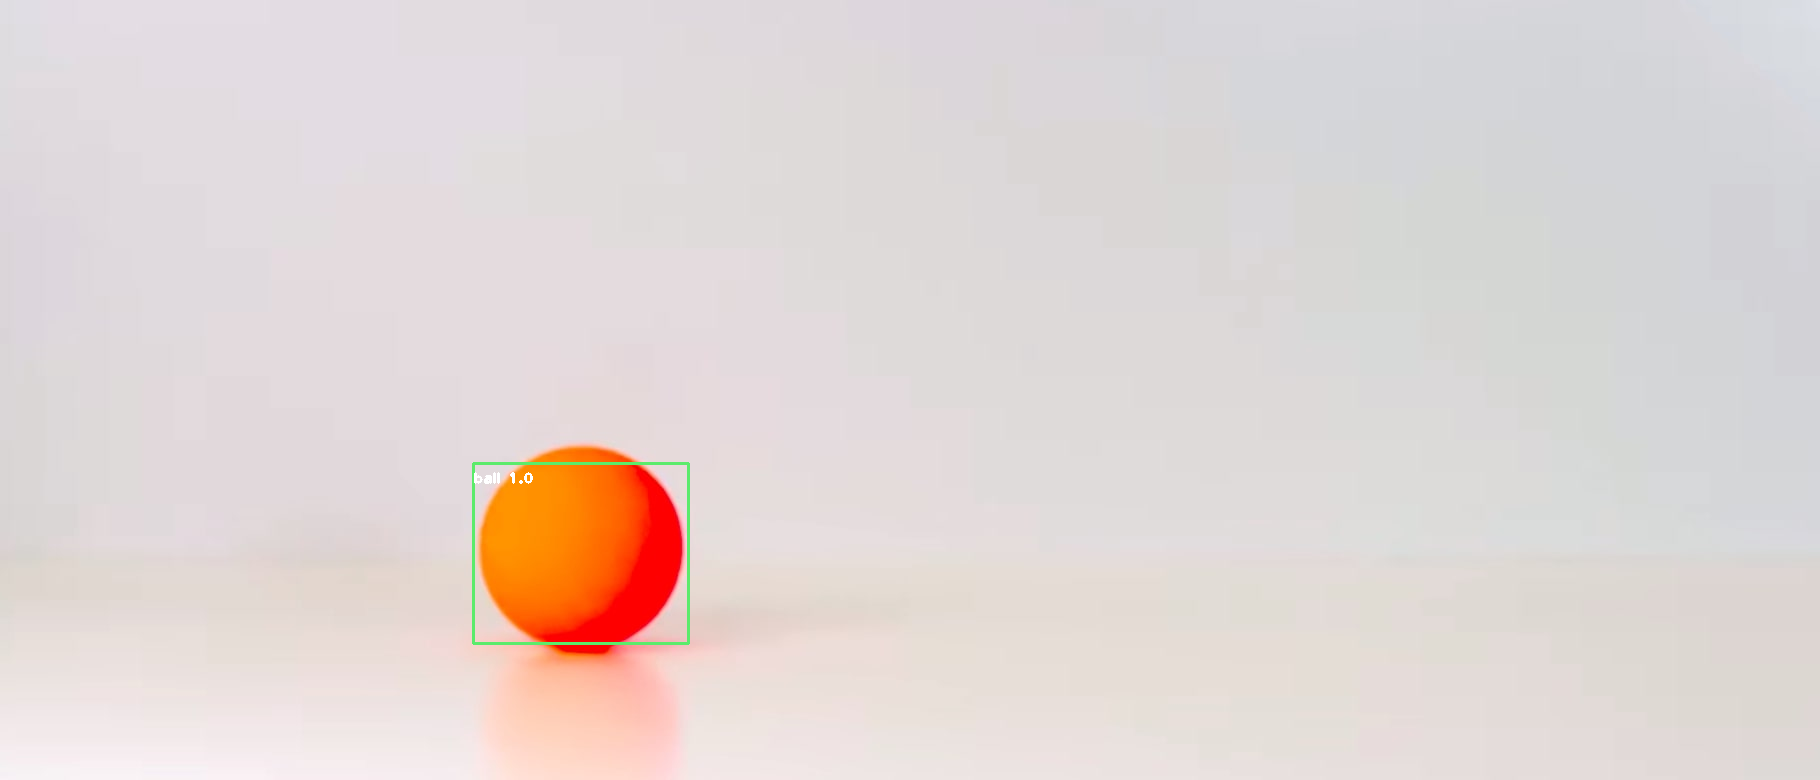

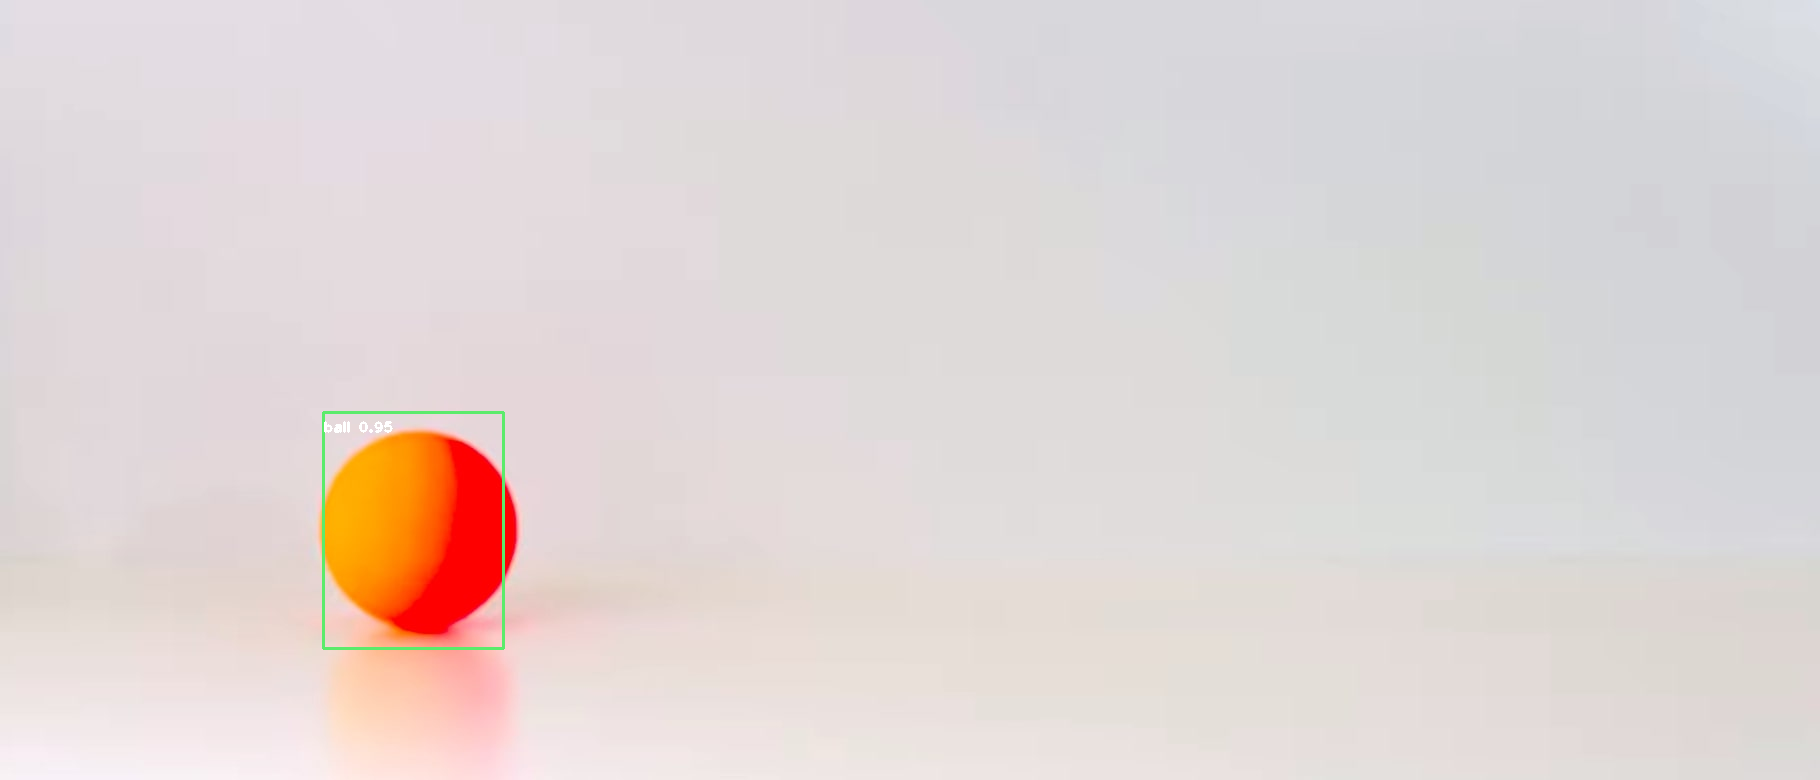

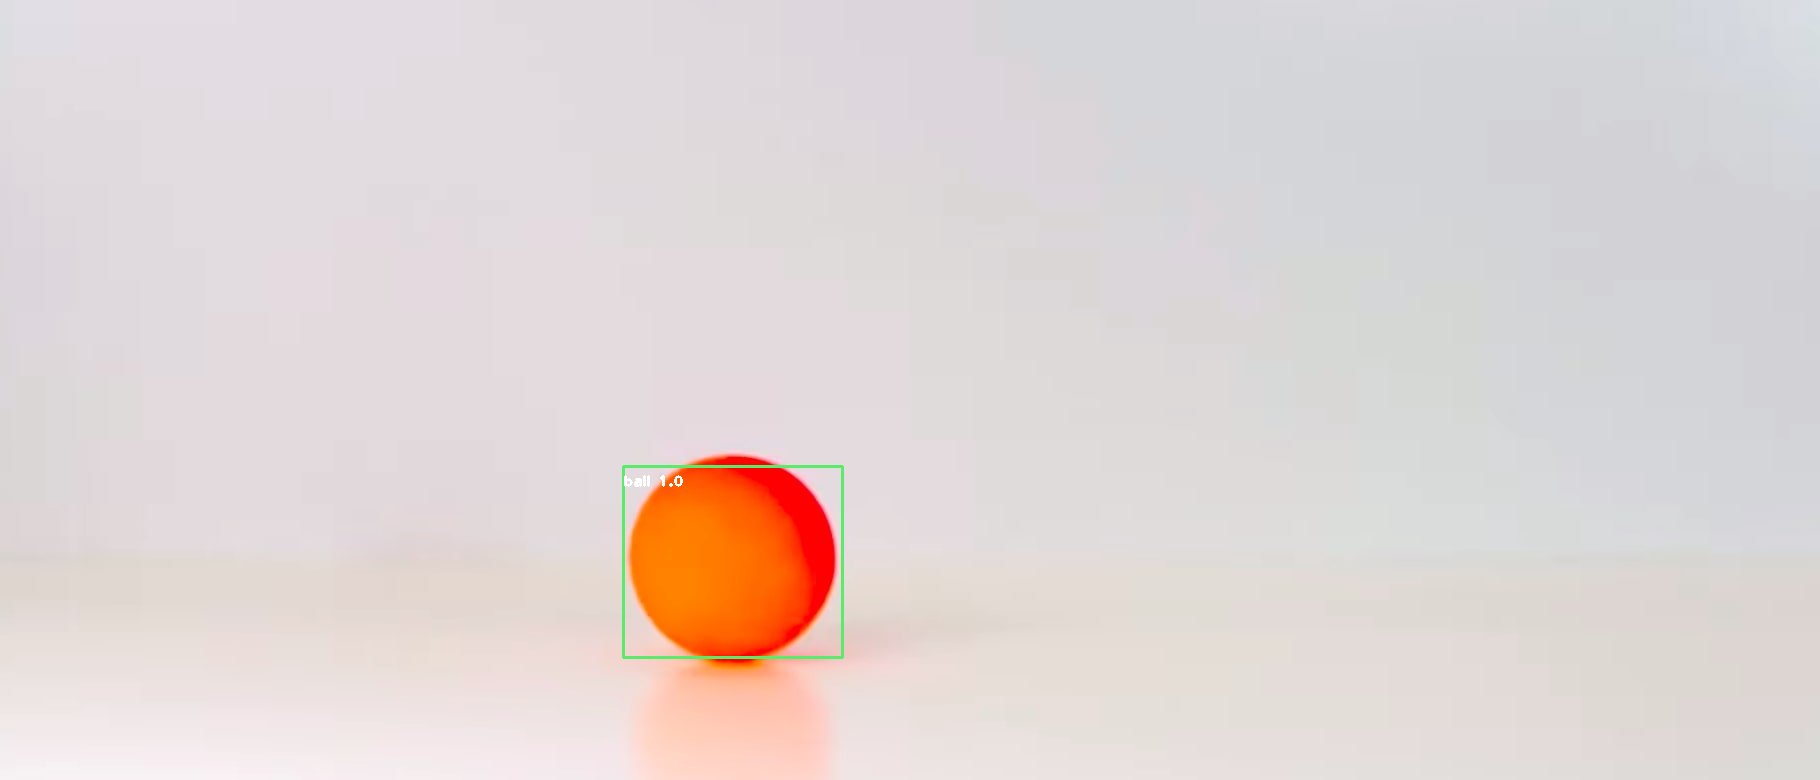

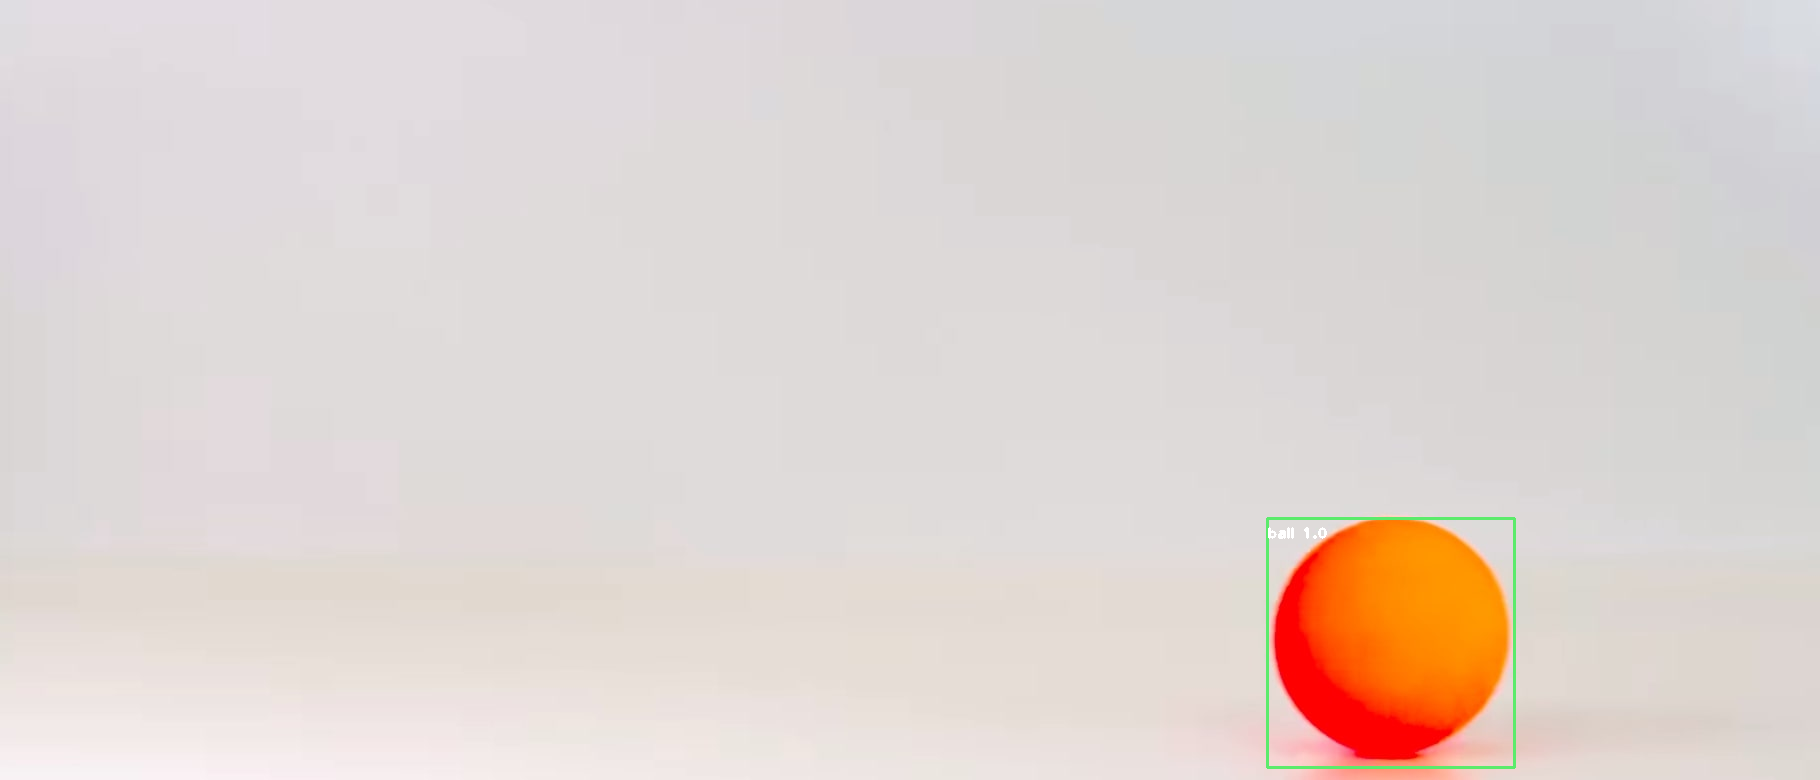

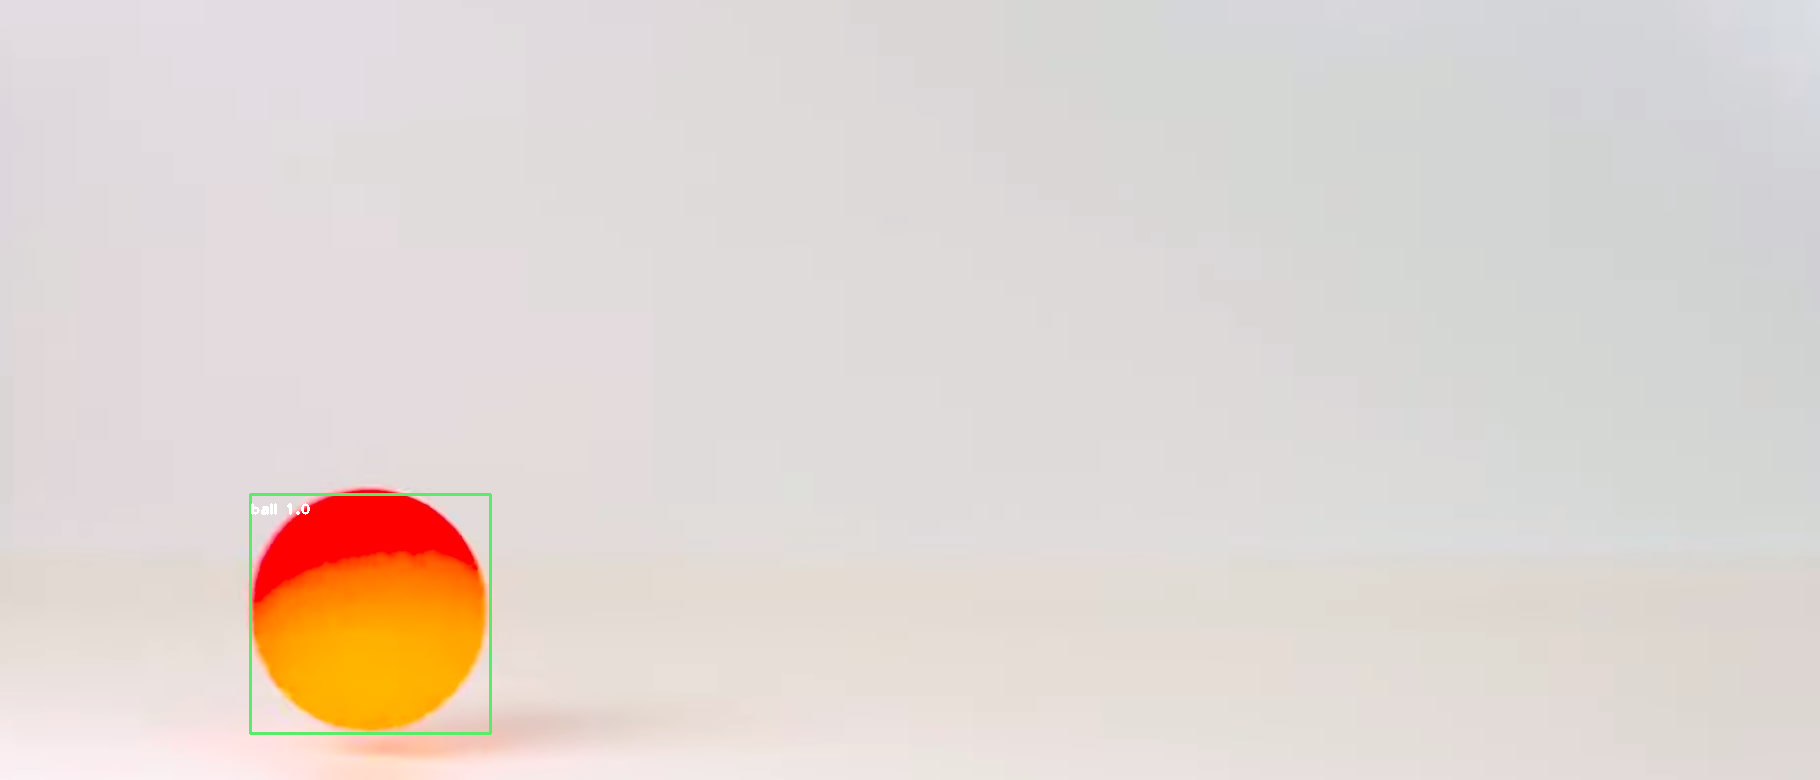

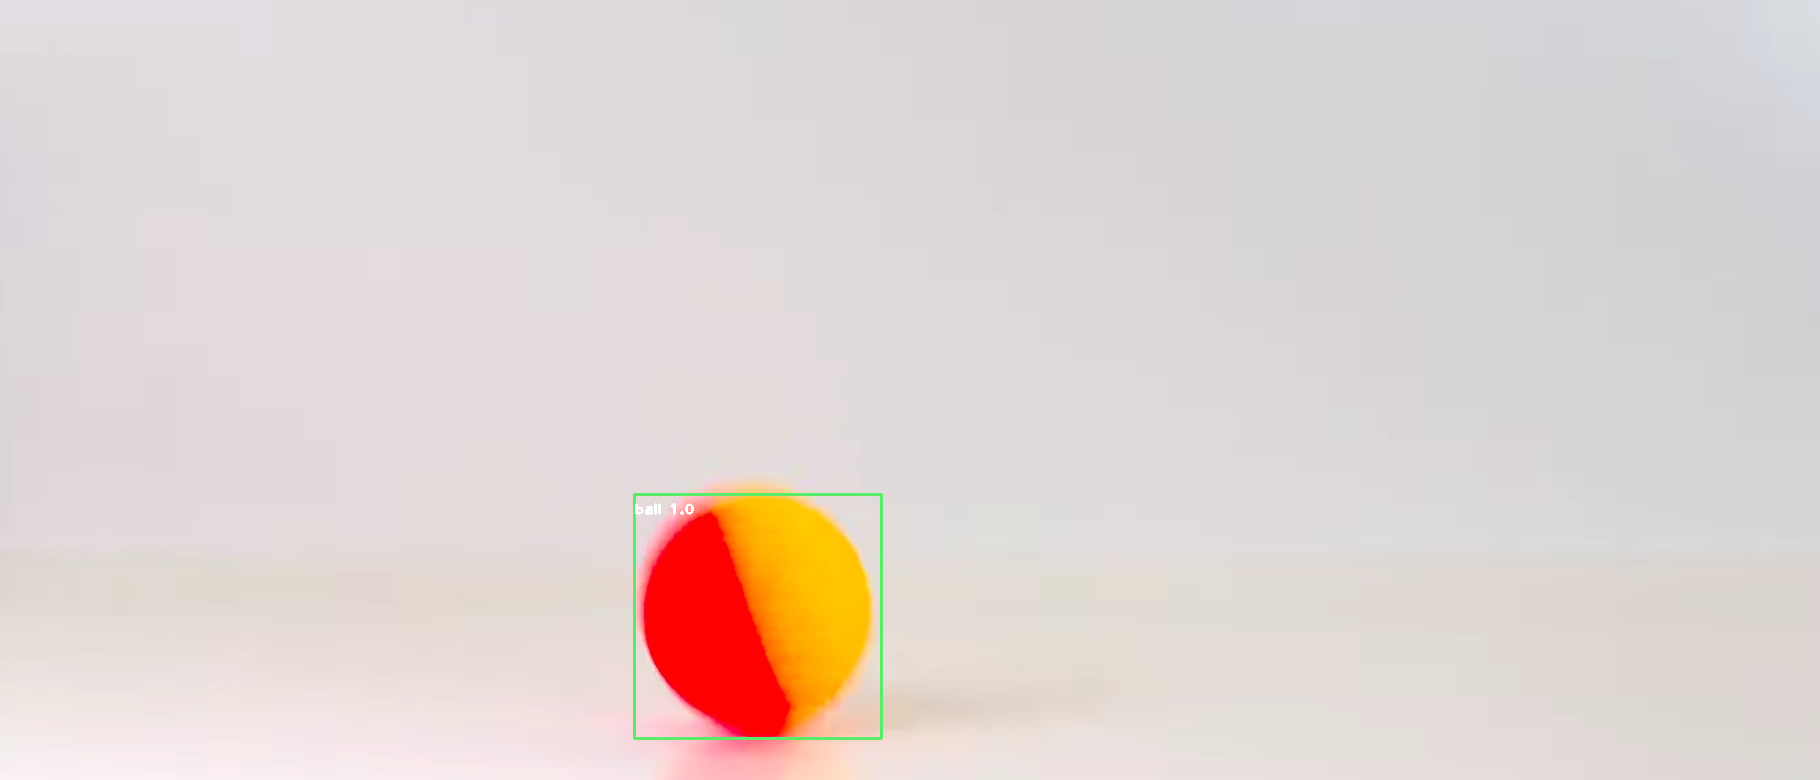

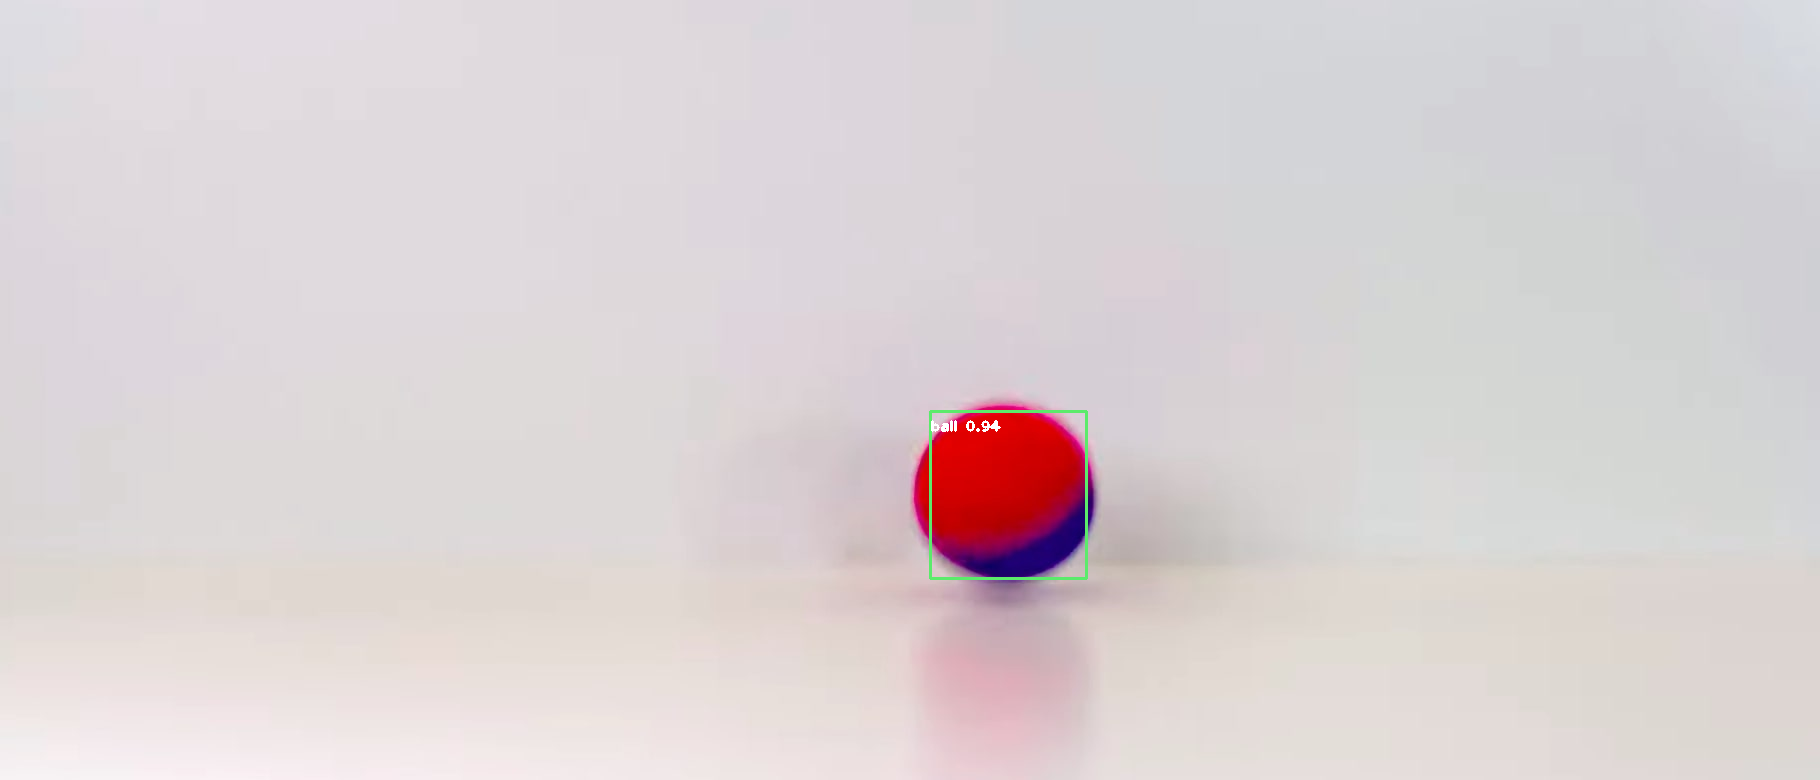

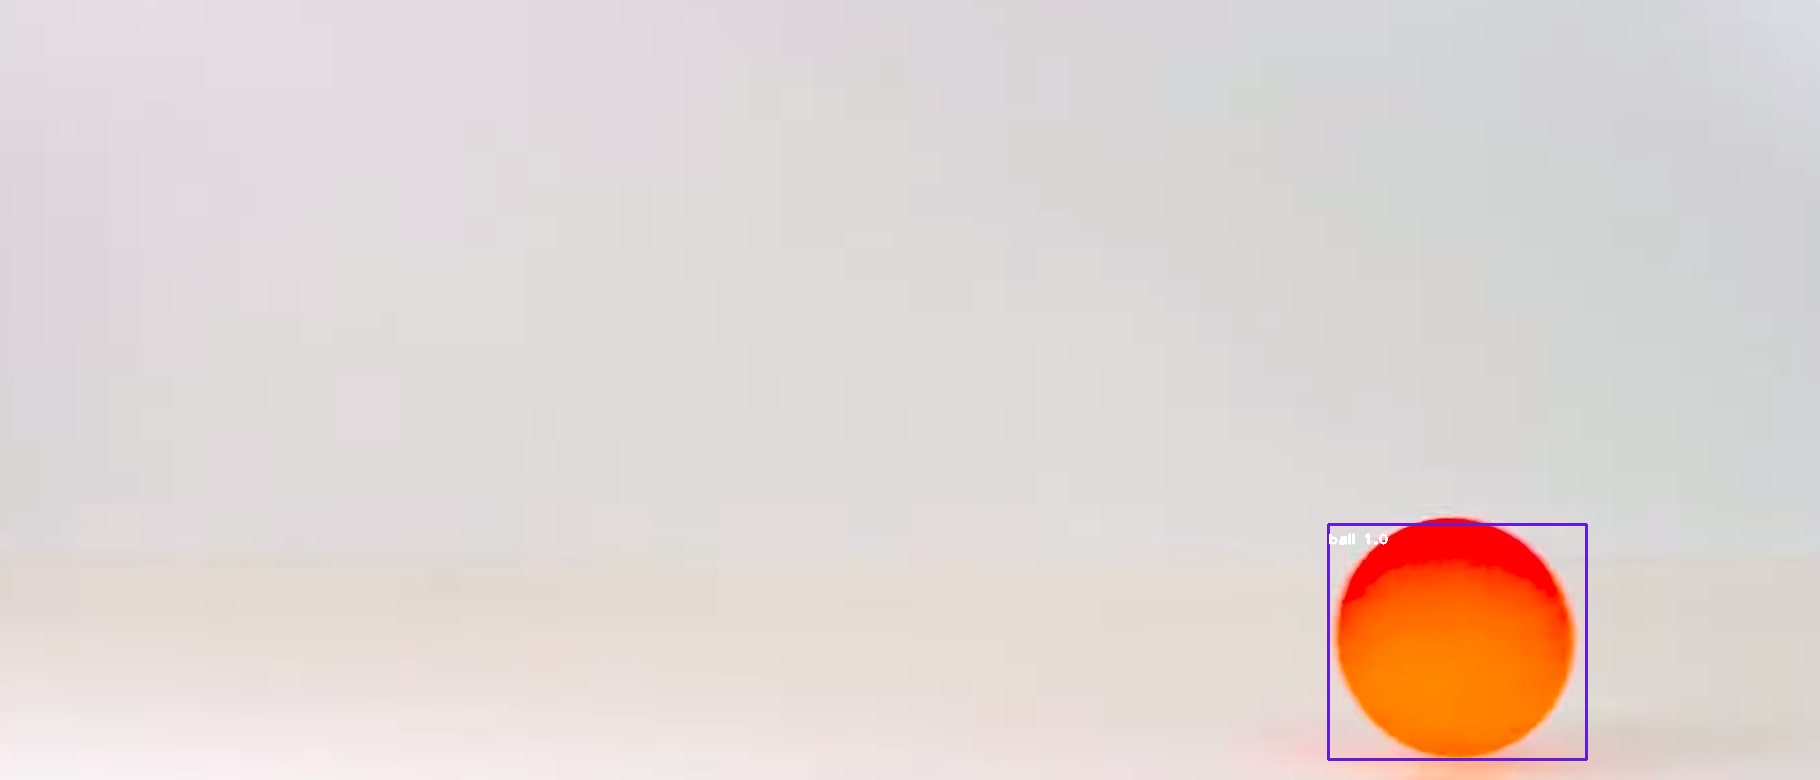

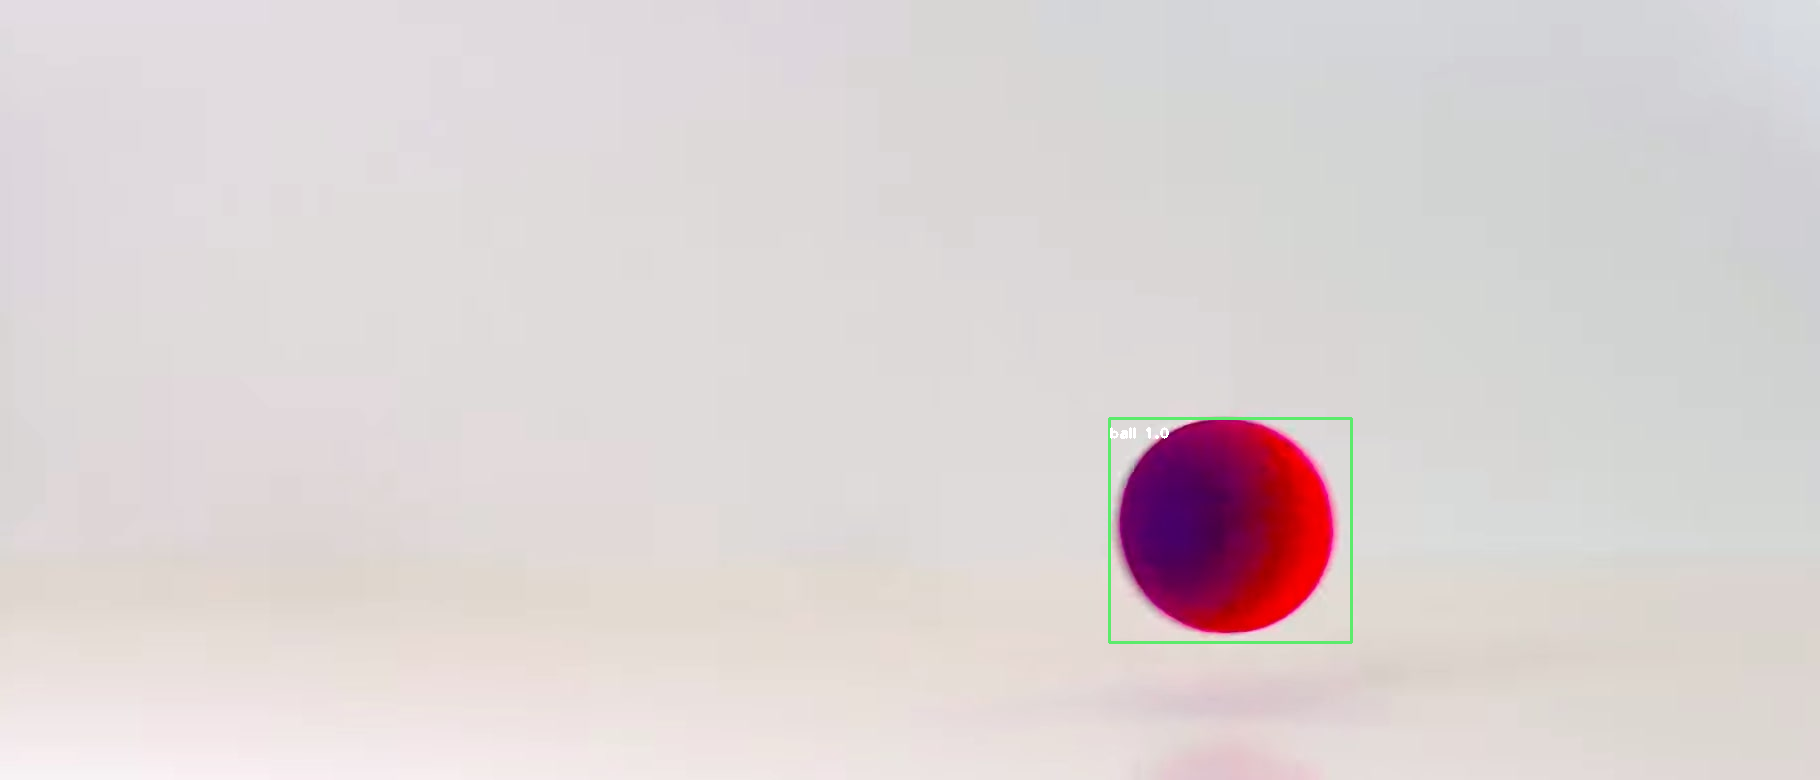

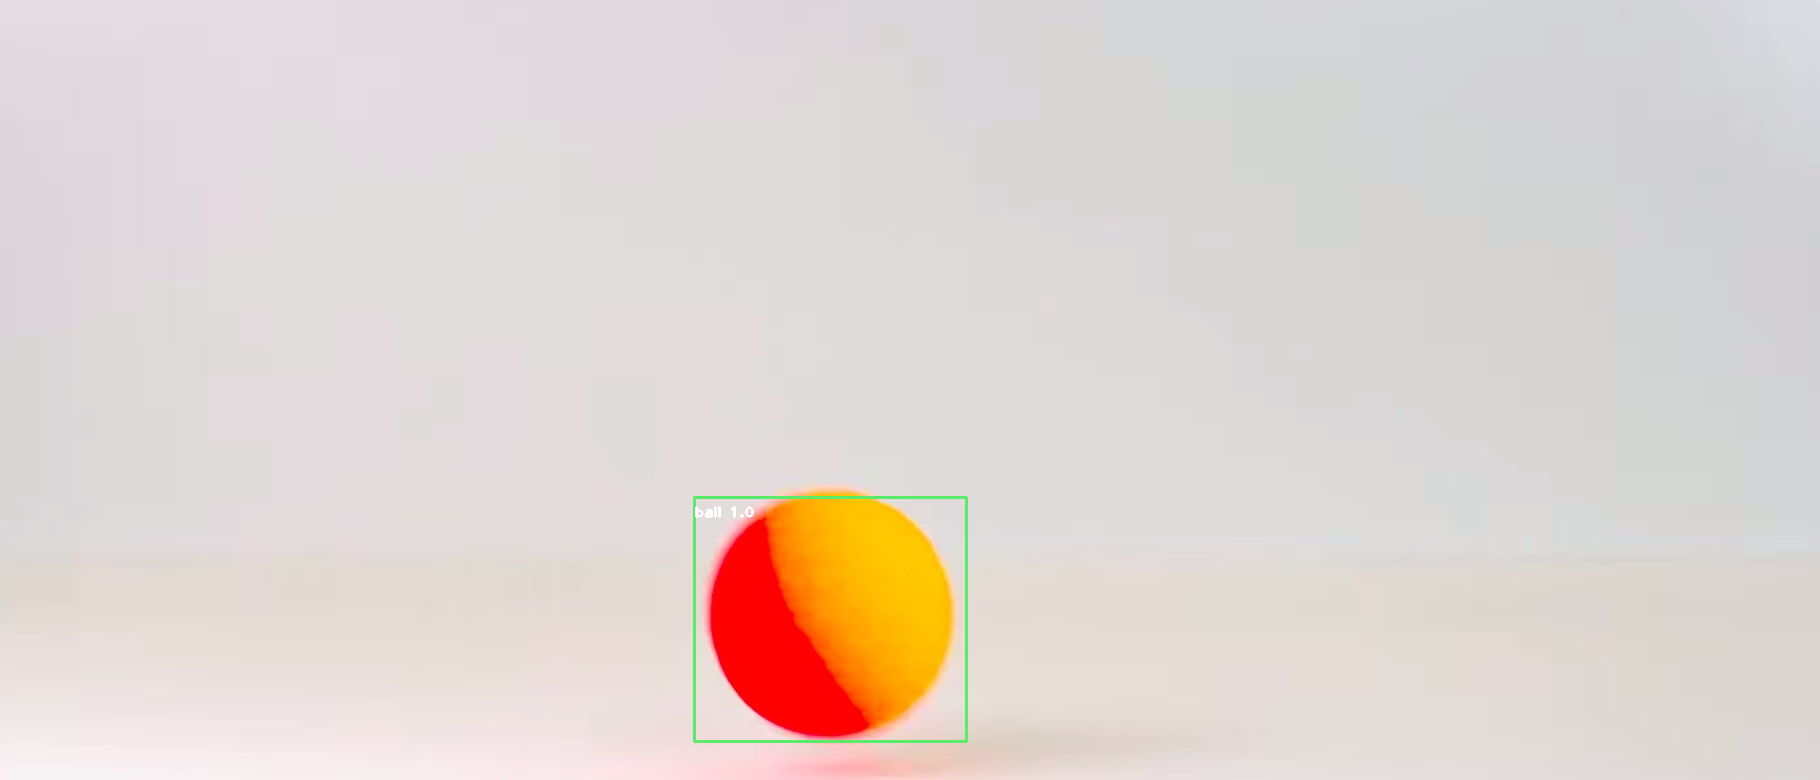

In [18]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

net = cv2.dnn.readNet('yolov3_training_last.weights', 'yolov3_testing.cfg')

classes = []
with open("classes.txt", "r") as f:
    classes = f.read().splitlines()

#cap = cv2.VideoCapture('video4.mp4')
#cap = 'test_images/<your_test_image>.jpg'
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size=(100, 3))

for g in range(91,101):
    #_, img = cap.read()
    img = cv2.imread(f"/content/gdrive/MyDrive/ARK_Task_5/image_dataset_YOLO/test/{g}.jpg")
    height, width, _ = img.shape
    #print(h)
    blob = cv2.dnn.blobFromImage(img, 1/255, (416, 416), (0,0,0), swapRB=True, crop=False)
    net.setInput(blob)
    output_layers_names = net.getUnconnectedOutLayersNames()
    layerOutputs = net.forward(output_layers_names)

    boxes = []
    confidences = []
    class_ids = []

    for output in layerOutputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.2:
                center_x = int(detection[0]*width)
                center_y = int(detection[1]*height)
                w = int(detection[2]*width)
                h = int(detection[3]*height)

                x = int(center_x - w/2)
                y = int(center_y - h/2)

                boxes.append([x, y, w, h])
                confidences.append((float(confidence)))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.2, 0.4)

    if len(indexes)>0:
        for i in indexes.flatten():
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence = str(round(confidences[i],2))
            color = colors[i]
            cv2.rectangle(img, (x,y), (x+w, y+h), color, 2)
            cv2.putText(img, label + " " + confidence, (x, y+20), font, 1, (255,255,255), 2)
    cv2.imwrite(f"/content/Detections_YOLOv3/{g}.png", img)
    cv2_imshow(img)
    #cv2.imshow('Image', img)
    #key = cv2.waitKey(1)
    #if key==27:
        #break

#cap.release()
cv2.destroyAllWindows()

In [19]:
!cp -r /content/Detections_YOLOv3 /content/gdrive/MyDrive/ARK_Task_5